In [2]:
#importing all the basics Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the dataset
url = "https://raw.githubusercontent.com/tranghth-lux/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt"
df1 = pd.read_csv(url)

In [4]:
#checking the first five rows of the data set
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#information of the features datatypes 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#copy of the Dataframe as df
df = df1.copy()

In [7]:
#checking all the features for number if unique values
for i,v in enumerate(df.columns,start = 1):
    print(f"Unique values for {v} is {df[v].nunique()}")

Unique values for satisfaction_level is 92
Unique values for last_evaluation is 65
Unique values for number_project is 6
Unique values for average_montly_hours is 215
Unique values for time_spend_company is 8
Unique values for Work_accident is 2
Unique values for left is 2
Unique values for promotion_last_5years is 2
Unique values for sales is 10
Unique values for salary is 3


### Count of every unique values

In [8]:

df["number_project"].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [9]:

df["time_spend_company"].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [10]:
df["Work_accident"].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [11]:
df["promotion_last_5years"].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [12]:
df["sales"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [13]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [14]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

# EDA

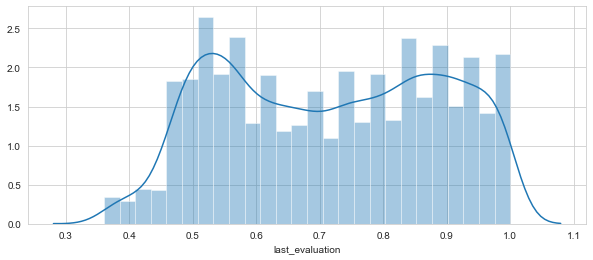

In [15]:
#distribution of last evaluation column
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
sns.distplot(df["last_evaluation"])

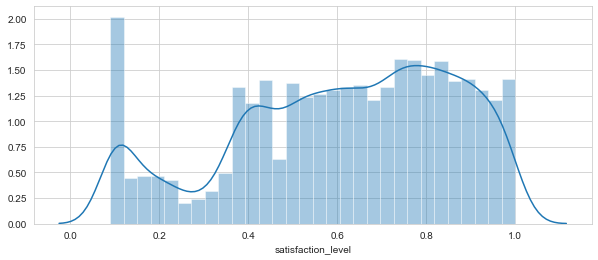

In [16]:
#distribution of satisfaction level column
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
sns.distplot(df["satisfaction_level"])

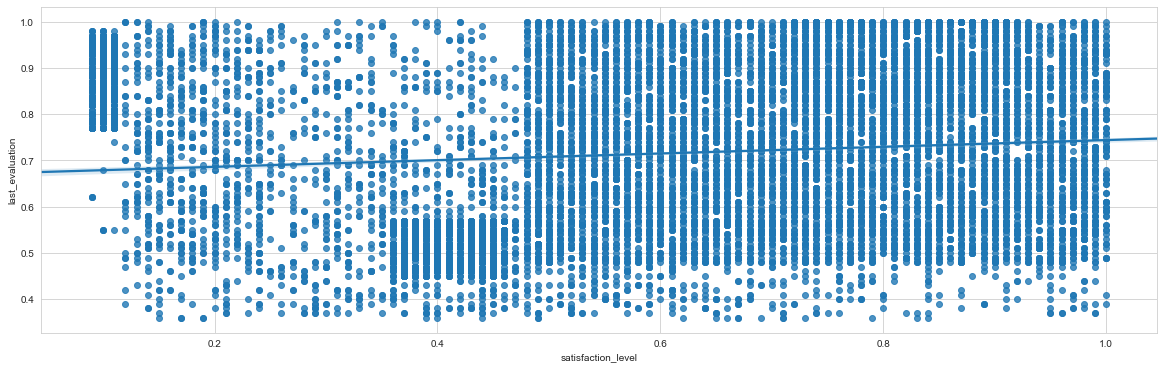

In [17]:
#scatter plot between last_evaluation and satisfaction_level
plt.figure(figsize=(20,6))
sns.regplot(data=df,x="satisfaction_level",y="last_evaluation")


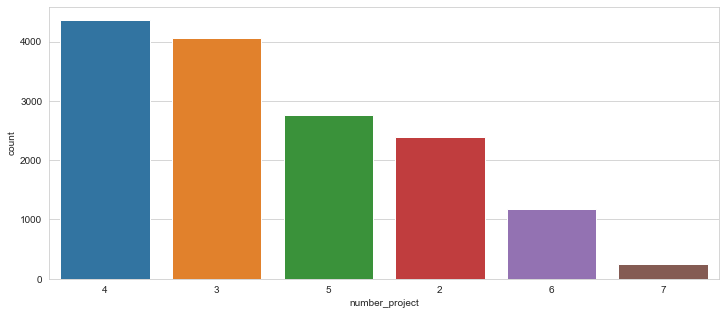

In [18]:
# countplot of number of projects
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="number_project",order=df["number_project"].value_counts().index)

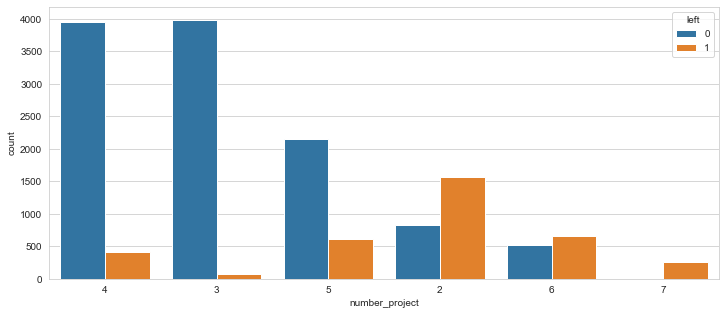

In [19]:
#count plot of number of project and left or not
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="number_project",hue="left",order=df["number_project"].value_counts().index)

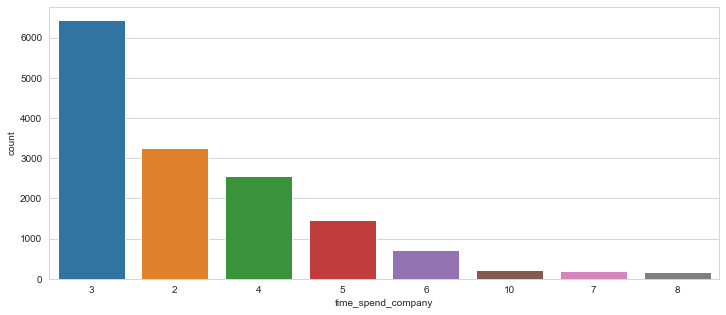

In [20]:
##count plot of time spend in the company 
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="time_spend_company",order=df["time_spend_company"].value_counts().index)

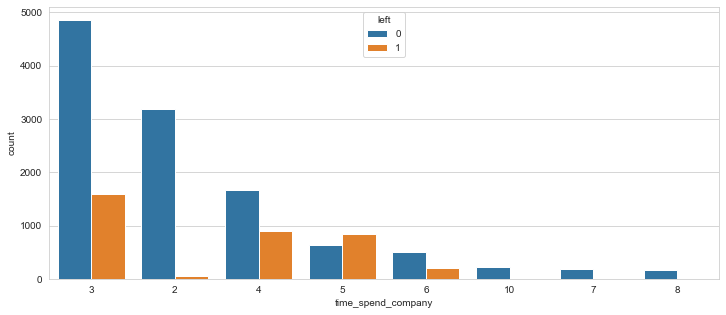

In [21]:
#count plot of time spend in the company and left or not
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="time_spend_company",hue="left",order=df["time_spend_company"].value_counts().index)

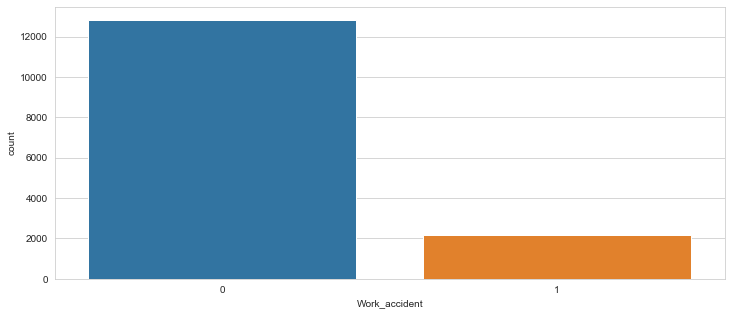

In [22]:
#count plot of work accident
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="Work_accident")

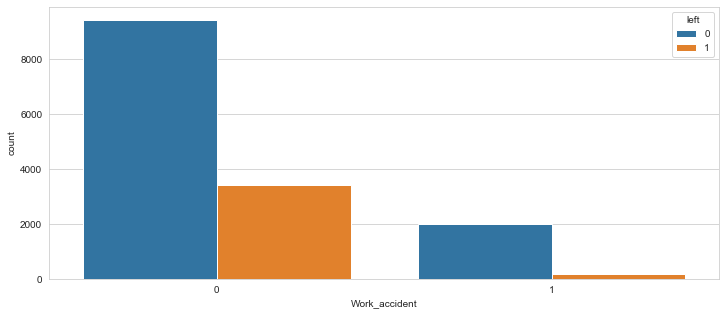

In [23]:
##count plot of work accident and left or not
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="Work_accident",hue="left")

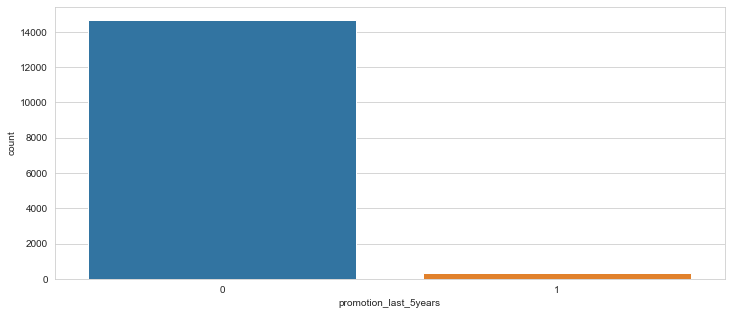

In [24]:
#count plot of promotion in last five years
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="promotion_last_5years")

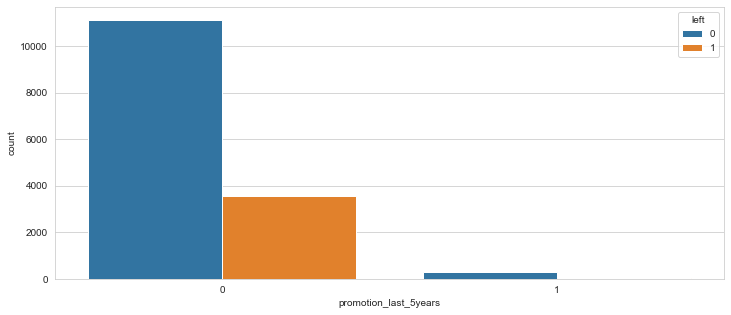

In [25]:
#count plot of promotion in last 5 years and left or not
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="promotion_last_5years",hue="left")

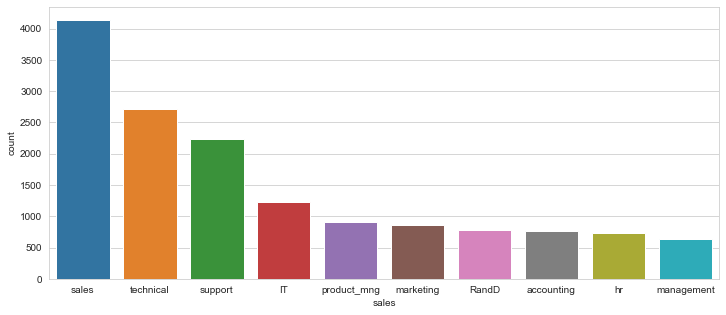

In [26]:
#count plot of sales branch
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="sales",order=df["sales"].value_counts().index)

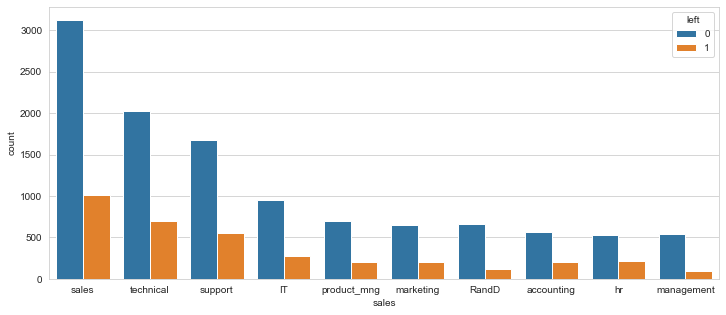

In [27]:
#count plot of sales branch and left or not
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="sales",hue="left",order=df["sales"].value_counts().index)

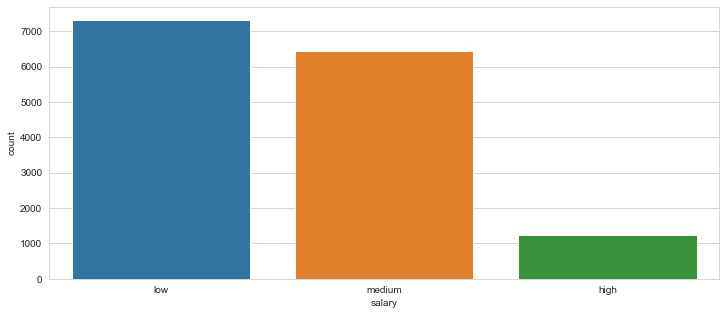

In [28]:
#count plot of salary
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="salary")

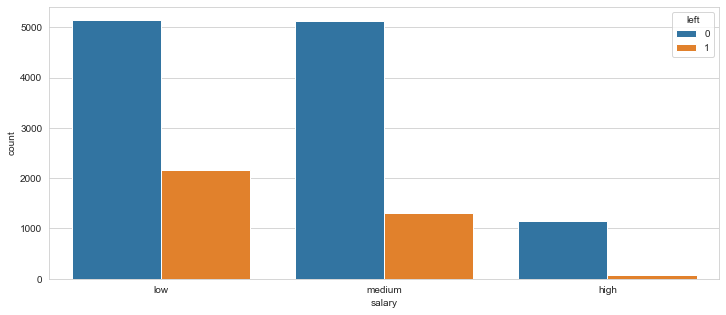

In [29]:
#count plot of salary and left or not
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="salary",hue="left")

In [30]:
#importing the preprocessing library
from sklearn import preprocessing

In [31]:
label_encoding = preprocessing.LabelEncoder()

In [32]:
#label encoding the salary column as the data was ordinal
df["salary"] = label_encoding.fit_transform(df["salary"])

In [33]:
df["salary"].value_counts()

1    7316
2    6446
0    1237
Name: salary, dtype: int64

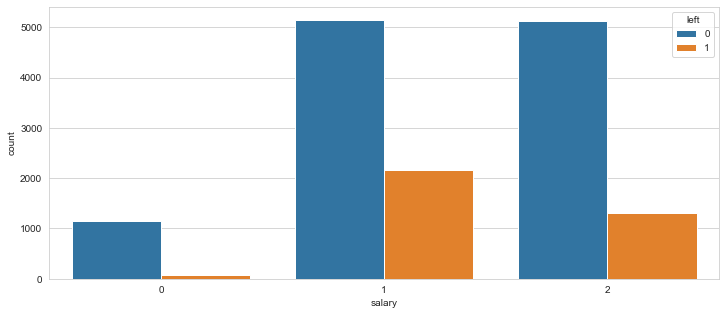

In [34]:
#count plot of the salary with left column
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="salary",hue="left")

From the complete EDA we see that this dataset is highly imbalanced. 
This is effect our model prediction also.

In [35]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [36]:
#onehotencoder for Nominal data od sales column
from sklearn.preprocessing import OneHotEncoder

In [37]:
ohe = OneHotEncoder()

In [38]:
pd.get_dummies(df,"sales",drop_first=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,0,0,0,1,0


In [39]:
#new dataframe for the Processed data of sales column
data = pd.get_dummies(df,"sales",drop_first=True)

In [40]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [41]:
#satandard scaler for scaling of the numerical columns
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
data[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","salary",]] = scaler.fit_transform(data[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","salary",]])

In [44]:
#new dataframe after preprocessing
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,1,0,-0.554955,0,0,0,0,0,0,1,0,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,1,0,1.043004,0,0,0,0,0,0,1,0,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,1,0,1.043004,0,0,0,0,0,0,1,0,0
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,1,0,-0.554955,0,0,0,0,0,0,1,0,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,1,0,-0.554955,0,0,0,0,0,0,1,0,0


In [45]:
#spliting of the data
from sklearn.model_selection import train_test_split

In [46]:
x = data.drop("left",axis=1)
y = data["left"]

In [47]:
#spliting into training and testing
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=5)

In [48]:
#Importing Linear logistic algorithm
from sklearn.linear_model import LogisticRegression

In [49]:
lm = LogisticRegression()

In [50]:
lm.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
#pullinf the test prediction
warnings.filterwarnings("ignore")
y_pred_train = lm.predict(xtrain)
y_pred_test = lm.predict(xtest)

In [55]:
#model evaluation using classification report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
#because of the high bias on 0 the F1-score i.e the harmonic mean of both precision and recall is more there
#our model is able to classfy 0 better than 1
print(classification_report(ytest,y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3411
           1       0.49      0.24      0.32      1089

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.72      4500



In [57]:
print(confusion_matrix(ytest,y_pred_test))

[[3135  276]
 [ 825  264]]


In [58]:
#evaluation of the training set
print(classification_report(ytrain,y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      8017
           1       0.54      0.26      0.35      2482

    accuracy                           0.77     10499
   macro avg       0.67      0.60      0.61     10499
weighted avg       0.74      0.77      0.74     10499



In [59]:
print(confusion_matrix(ytrain,y_pred_train))

[[7452  565]
 [1828  654]]


In [64]:
#model evaluation on the individual scores
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

In [67]:
#test set
p = precision_score(ytest,y_pred_test,average="binary")
r = recall_score(ytest,y_pred_test,average="binary")
f = f1_score(ytest,y_pred_test,average="binary")
a = accuracy_score(ytest,y_pred_test)

In [68]:
print(f"Precision: {p}")
print(f"Reacll: {r}")
print(f"f1: {f}")
print(f"Accuracy: {a}")

Precision: 0.4888888888888889
Reacll: 0.24242424242424243
f1: 0.3241252302025783
Accuracy: 0.7553333333333333


In [69]:
#train set
p = precision_score(ytrain,y_pred_train,average="binary")
r = recall_score(ytrain,y_pred_train,average="binary")
f = f1_score(ytrain,y_pred_train,average="binary")
a = accuracy_score(ytrain,y_pred_train)

In [70]:
print(f"Precision: {p}")
print(f"Reacll: {r}")
print(f"f1: {f}")
print(f"Accuracy: {a}")

Precision: 0.5365053322395406
Reacll: 0.2634971796937953
f1: 0.35341799513644967
Accuracy: 0.7720735308124583
